In [1]:
from IPython.display import clear_output, display

import time
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# run installed version of flopy or add local path
try:
    import flopy
except:
    fpth = os.path.abspath(os.path.join('..', '..'))
    sys.path.append(fpth)
    import flopy

print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('pandas version: {}'.format(pd.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.20.2
matplotlib version: 3.3.4
pandas version: 1.2.4
flopy version: 3.3.3


In [2]:
"""# get the spatial refernce from the model
tmp_model_ws = os.path.join('.')
sim = flopy.mf6.MFSimulation.load(sim_ws=tmp_model_ws, verbosity_level=0)
m = sim.get_model("test")"""

'# get the spatial refernce from the model\ntmp_model_ws = os.path.join(\'.\')\nsim = flopy.mf6.MFSimulation.load(sim_ws=tmp_model_ws, verbosity_level=0)\nm = sim.get_model("test")'

In [3]:
# works wiht triangular mesh

def disu2disv(filename):
    import pandas as pd

    def get_sentences(filename, keyword):
        with open(filename, 'r') as f:
            begin = 'BEGIN '+keyword
            end = 'END '+keyword
            results=[]
            start = False
            for line in f:
                if begin in line:
                    start = True# results = []
                elif end in line:
                    start= False #yield results
                if start: #else:
                    results.append(line)
            results = [i.strip().split() for i in results[2:]]
            df = pd.DataFrame(results, dtype='float')

            df2 = (df-1).fillna(-1e30).astype('int')#.astype('str')#.replace('-1',np.nan)
            df2[[1,2]] = df[[1,2]]
            if keyword == 'CELL2D':
                df2[3] = df[3].astype('int')
            new_li = list(map(list, df2.itertuples(index=False))) #retains the data type

            from math import isnan
            new_li2 = [[e for e in l if e > -99999] for l in new_li]

            return new_li2


    cell2d = get_sentences(filename, 'CELL2D')
    ncpl = len(cell2d)
    vertices = get_sentences(filename, 'VERTICES')
    nvert = len(vertices)

    return nvert, vertices, cell2d, ncpl

nvert, vertices, cell2d, ncpl = disu2disv(os.path.join('algomesh','voronoi','m5_mf6.disu'))

In [4]:
cell2d[0]

[0, 224344.8305, 6240.7604, 6, 38, 33, 31, 19, 18, 5]

In [5]:
filename = os.path.join('algomesh','voronoi','m5_mf6.disu')
keyword = 'CELL2D'
with open(filename, 'r') as f:
    begin = 'BEGIN '+keyword
    end = 'END '+keyword
    results=[]
    start = False
    for line in f:
        if begin in line:
            start = True# results = []
        elif end in line:
            start= False #yield results
        if start: #else:
            results.append(line)
    results = [i.strip().split() for i in results[2:]]
    df = pd.DataFrame(results, dtype='float')

    df2 = (df-1).fillna(-1e30).astype('int')#.astype('str')#.replace('-1',np.nan)
    df2[[1,2]] = df[[1,2]]
    if keyword == 'CELL2D':
        df2[3] = df[3].astype('int')
    new_li = list(map(list, df2.itertuples(index=False))) #retains the data type

    from math import isnan
    new_li2 = [[e for e in l if e > -99999] for l in new_li]
new_li2[0]

[0, 224344.8305, 6240.7604, 6, 38, 33, 31, 19, 18, 5]

In [6]:
cell2d[0]

[0, 224344.8305, 6240.7604, 6, 38, 33, 31, 19, 18, 5]

In [7]:
cell2d[0]

[0, 224344.8305, 6240.7604, 6, 38, 33, 31, 19, 18, 5]

In [8]:
# it seems they are written counterclockwise when Voronoi???? shouldnt be cockwise??

"""cell2d = [i[:3]+[i[3]+1]+i[::-1][:-4]+[i[-1]] for i in cell2d]
cell2d = [[e for e in l if e !='None'] for l in cell2d]

cell2d[0]"""

"cell2d = [i[:3]+[i[3]+1]+i[::-1][:-4]+[i[-1]] for i in cell2d]\ncell2d = [[e for e in l if e !='None'] for l in cell2d]\n\ncell2d[0]"

In [9]:
"""
tmp_model_ws = os.path.join('.', 'algomesh')
sim = flopy.mf6.MFSimulation.load(sim_ws=tmp_model_ws, verbosity_level=1)
m = sim.get_model("test_tri")

sim.get_package('DISU')

tdis = flopy.mf6.ModflowTdis(sim, pname='tdis', time_units='DAYS', nper=len(tdis_rc),
                             perioddata=tdis_rc)
npf = flopy.mf6.ModflowGwfnpf(m, 
                              icelltype=1, 
                              k=1,
                              k33=1, k33overk=True)                             
ic = flopy.mf6.ModflowGwfic(m, pname='ic', strt=320.)

sim.write_simulation()

# need to correect the last column cellid -1
vertices = m.dis.vertices.array
cell2d = m.dis.cell2d.array
nvert = m.dis.nvert.array
ncpl = m.dis.nodes.array"""

'\ntmp_model_ws = os.path.join(\'.\', \'algomesh\')\nsim = flopy.mf6.MFSimulation.load(sim_ws=tmp_model_ws, verbosity_level=1)\nm = sim.get_model("test_tri")\n\nsim.get_package(\'DISU\')\n\ntdis = flopy.mf6.ModflowTdis(sim, pname=\'tdis\', time_units=\'DAYS\', nper=len(tdis_rc),\n                             perioddata=tdis_rc)\nnpf = flopy.mf6.ModflowGwfnpf(m, \n                              icelltype=1, \n                              k=1,\n                              k33=1, k33overk=True)                             \nic = flopy.mf6.ModflowGwfic(m, pname=\'ic\', strt=320.)\n\nsim.write_simulation()\n\n# need to correect the last column cellid -1\nvertices = m.dis.vertices.array\ncell2d = m.dis.cell2d.array\nnvert = m.dis.nvert.array\nncpl = m.dis.nodes.array'

In [10]:
verts = np.array([[i[1],i[2]] for i in vertices])
verts

array([[221159.3986,   8655.265 ],
       [226714.2624,   7039.4891],
       [223839.1186,   6330.6572],
       ...,
       [204406.25  ,  15000.    ],
       [204812.5   ,  15000.    ],
       [204000.    ,  15000.    ]])

In [11]:
for cell in range(ncpl):
    #cell = 14298
    vlist = cell2d[cell][4:]
    vtemp=[]
    for v in vlist:
        if v == None:
            continue
        vtemp.append(list(vertices[v]))

    area = 0
    edge = 0
    for i in range(len(vtemp)):
        v = vtemp[i]
        x1 = v[1]
        y1 = v[2]
        if v == vtemp[-1]:
            x2=vtemp[0][1]
            y2=vtemp[0][2]
        else:
            x2 = vtemp[i+1][1]
            y2 = vtemp[i+1][2]
        area += (x1 * y2 - x2 * y1)
        edge += (x2-x1)*(y2+y1)

    if area > 0: #negative area means clockwise; if the edge positive it is clockwise
        #print(f'{cell2d[cell][0]} is in less than zero')
        cell2d[cell] = [i for i in cell2d[cell] if i!=None]
        cell2d[cell][4:] = cell2d[cell][4:][::-1]
        #cell2d[cell] = tuple(cell2d[cell])


In [12]:
area

393554.6875

In [13]:
#cell2d[14298] #1276 in the dis file; by defult has positive area, but is counter-clockwise

In [14]:
# get the spatial refernce from the model
model_ws = os.path.join(".")
model_name = 'test'
perlen = 1
nstp = 10

# create simulation
sim = flopy.mf6.MFSimulation(sim_name=model_name, version='mf6', exe_name='mf6', 
                             sim_ws=model_ws)

# create tdis package
tdis_rc = [(0.0, 1, 1.0),(perlen, nstp, 1.0)] #perioddata[perlen, nstp, tsmult]

tdis = flopy.mf6.ModflowTdis(sim, pname='tdis', time_units='DAYS', nper=len(tdis_rc),
                             perioddata=tdis_rc)

# create gwf model
gwf = flopy.mf6.ModflowGwf(sim, modelname=model_name,
                           model_nam_file='{}.nam'.format(model_name))#,model_rel_path='modflow6',)
gwf.name_file.save_flows = True

# create iterative model solution and register the gwf model with it
ims = flopy.mf6.ModflowIms(sim, pname='ims', print_option='SUMMARY', 
                           complexity='SIMPLE', outer_hclose=1.e-5, 
                           outer_maximum=100, under_relaxation='NONE', 
                           inner_maximum=100, inner_hclose=1.e-6, 
                           rcloserecord=0.1, linear_acceleration='BICGSTAB', 
                           scaling_method='NONE', reordering_method='NONE', 
                           relaxation_factor=0.99)
sim.register_ims_package(ims, [gwf.name])

# disv
# nvert, vertices, cell2d, ncpl
dis = flopy.mf6.ModflowGwfdisv(model=gwf, nlay=1, ncpl=ncpl, nvert=nvert, top=100, botm=0, vertices=vertices, cell2d=cell2d)

npf = flopy.mf6.ModflowGwfnpf(gwf, 
                              icelltype=1, 
                              k=1,
                              k33=1, k33overk=True)
# output control
oc = flopy.mf6.ModflowGwfoc(gwf, pname='oc', 
                            budget_filerecord='{}.cbb'.format(model_name),
                            head_filerecord='{}.hds'.format(model_name),
                            headprintrecord=[('COLUMNS', 10, 'WIDTH', 15,
                                              'DIGITS', 6, 'GENERAL')],
                            saverecord=[('HEAD', 'LAST'), ('BUDGET', 'LAST')],
                            printrecord=[('HEAD', 'LAST'), ('BUDGET', 'LAST')])

In [15]:
"""rch = flopy.mf6.ModflowGwfrch(gwf, filename='{}.rch'.format(model_name), 
                               pname='rch', fixed_cell=True,
                               auxiliary='MULTIPLIER', auxmultname='MULTIPLIER',boundnames=True,
                               print_input=True, print_flows=True, save_flows=True,
                                stress_period_data=100)"""
# initial conditions
ic = flopy.mf6.ModflowGwfic(gwf, pname='ic', strt=320.)

In [16]:
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims...
  writing model test...
    writing model name file...
    writing package disv...
    writing package npf...
    writing package oc...
    writing package ic...


In [17]:
sim.run_simulation()

FloPy is using the following  executable to run the model: C:\Program Files\MODFLOW\mf6.2.0\bin\mf6.EXE
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 08:24:05 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthorized use. Also refer to th

(True, [])

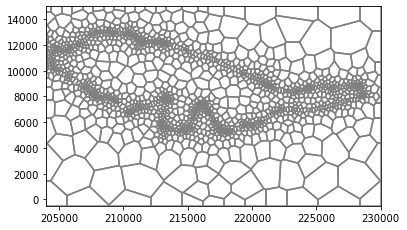

In [18]:
gwf.modelgrid.plot()